In [349]:
# “Which vendors are driving the most revenue?”

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

# Replace with your credentials
username = "postgres"
password = "ThePasswordis19!"
host = "localhost"
port = "5432"
database = "Vendor_Analysis"

# --- Create PostgreSQL connection engine ---
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')


In [350]:
# --- Load the aggregated table into a pandas DataFrame ---
df = pd.read_sql("SELECT * FROM vendor_sales_summary_clean_addedcols;", engine)

In [351]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,Total_Purchase_Quantity,Total_Purchase_in_Dollars,Total_Sales_Quantity,Total_Sales_in_Dollars,Total_Sales_Price,Total_Excise_Tax,Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sales_to_Purchase_Ratio
0,9552,M S WALKER INC,10937,Grahams 30-Yr Tawny Port,61.64,89.99,750.0,15.0,924.60,15.0,1349.85,899.90,1.66,55551.82,425.25,31.503500,1.000000,1.459929
1,6785,PALM BAY INTERNATIONAL INC,18433,Bertani Amarone 04,62.91,94.99,750.0,7.0,440.37,63.0,5984.37,4654.51,6.93,13605.41,5544.00,92.641331,9.000000,13.589413
2,9552,M S WALKER INC,36571,Matanzas Creek Chard Sonoma,16.33,25.99,750.0,12.0,195.96,21.0,543.79,334.87,2.34,55551.82,347.83,63.964030,1.750000,2.775005
3,90017,THE IMPORTED GRAPE LLC,45577,Pacifico Sur Chard Curico,2.80,5.29,750.0,72.0,201.60,69.0,503.01,87.48,7.75,80.03,301.41,59.921274,0.958333,2.495089
4,2000,SOUTHERN WINE & SPIRITS NE,32137,F Coppola Diamond Znfd,9.39,15.99,750.0,1334.0,12526.26,1438.0,21723.62,15630.68,158.93,19016.59,9197.36,42.338063,1.077961,1.734246


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
Actual_Price,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
Total_Purchase_Quantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
Total_Purchase_in_Dollars,10692.0,30106.693372,123067.799627,0.710000,453.457500,3655.465000,20738.245000,3.811252e+06
Total_Sales_Quantity,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
Total_Sales_in_Dollars,10692.0,42239.074419,167655.265984,0.000000,729.220000,5298.045000,28396.915000,5.101920e+06
Total_Sales_Price,10692.0,18793.783627,44952.773386,0.000000,289.710000,2857.800000,16059.562500,6.728193e+05


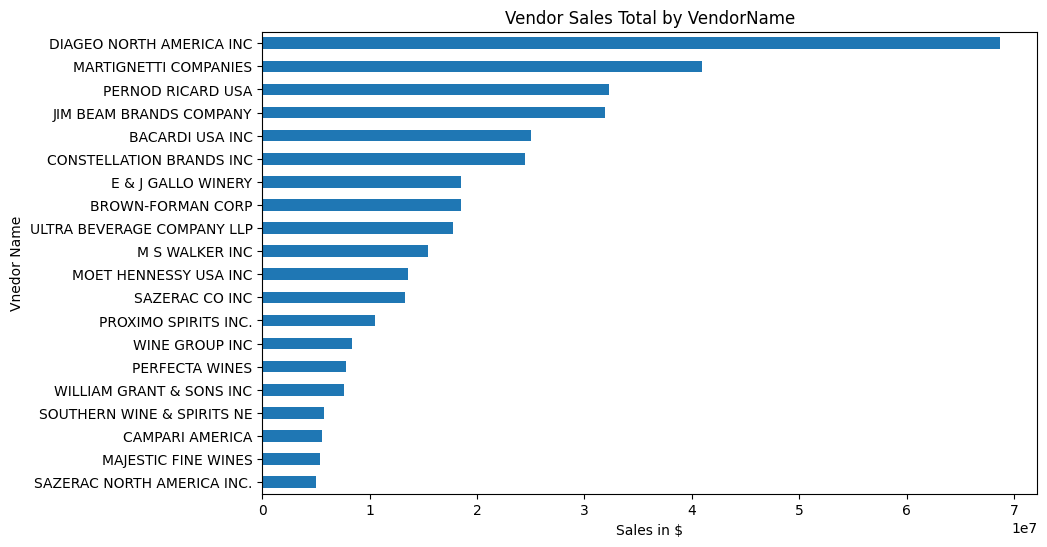

In [271]:
# “Which vendors are driving the most revenue?”

# SO lets first get our top 10 vendors
top_sales = df.groupby(df["VendorName"])["Total_Sales_in_Dollars"].sum().nlargest(20)

top_sales.plot(kind="barh", figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title("Vendor Sales Total by VendorName")
plt.xlabel("Sales in $")
plt.ylabel("Vnedor Name")
plt.show() 


In [274]:
df["Total_Sales_in_Dollars"].describe()

count    1.069200e+04
mean     4.223907e+04
std      1.676553e+05
min      0.000000e+00
25%      7.292200e+02
50%      5.298045e+03
75%      2.839691e+04
max      5.101920e+06
Name: Total_Sales_in_Dollars, dtype: float64

In [293]:
df.groupby(df["VendorName"])["Total_Sales_in_Dollars"].sum().describe()


count    1.280000e+02
mean     3.528283e+06
std      9.020532e+06
min      0.000000e+00
25%      3.537288e+04
50%      1.605003e+05
75%      2.539361e+06
max      6.873983e+07
Name: Total_Sales_in_Dollars, dtype: float64

In [59]:
top_Vendors = df.groupby("VendorName")["Total_Sales_in_Dollars"].sum().nlargest(20)

top_Vendors # so we see the names of top vendors - by --> Total Sales in Dollars 

# So right these were just the top Vendors by Total Sales in $ - But Not necessarily the Most Profitable Vendors so lets find those out 

VendorName
DIAGEO NORTH AMERICA INC      6.873983e+07
MARTIGNETTI COMPANIES         4.096012e+07
PERNOD RICARD USA             3.227954e+07
JIM BEAM BRANDS COMPANY       3.189862e+07
BACARDI USA INC               2.500537e+07
CONSTELLATION BRANDS INC      2.446713e+07
E & J GALLO WINERY            1.855377e+07
BROWN-FORMAN CORP             1.847661e+07
ULTRA BEVERAGE COMPANY LLP    1.780265e+07
M S WALKER INC                1.543607e+07
MOET HENNESSY USA INC         1.354518e+07
SAZERAC CO INC                1.325058e+07
PROXIMO SPIRITS INC.          1.051530e+07
WINE GROUP INC                8.340493e+06
PERFECTA WINES                7.779747e+06
WILLIAM GRANT & SONS INC      7.635228e+06
SOUTHERN WINE & SPIRITS NE    5.704568e+06
CAMPARI AMERICA               5.604628e+06
MAJESTIC FINE WINES           5.375429e+06
SAZERAC NORTH AMERICA INC.    4.964318e+06
Name: Total_Sales_in_Dollars, dtype: float64

In [275]:
df["Gross_Profit"].describe()

count    1.069200e+04
mean     1.213238e+04
std      4.622434e+04
min     -5.200278e+04
25%      5.292000e+01
50%      1.399640e+03
75%      8.660200e+03
max      1.290668e+06
Name: Gross_Profit, dtype: float64

In [294]:
df.groupby("VendorName")["Gross_Profit"].sum().describe()

count    1.280000e+02
mean     1.013433e+06
std      2.521472e+06
min     -9.194030e+03
25%      3.753860e+03
50%      3.292304e+04
75%      7.801283e+05
max      1.778004e+07
Name: Gross_Profit, dtype: float64

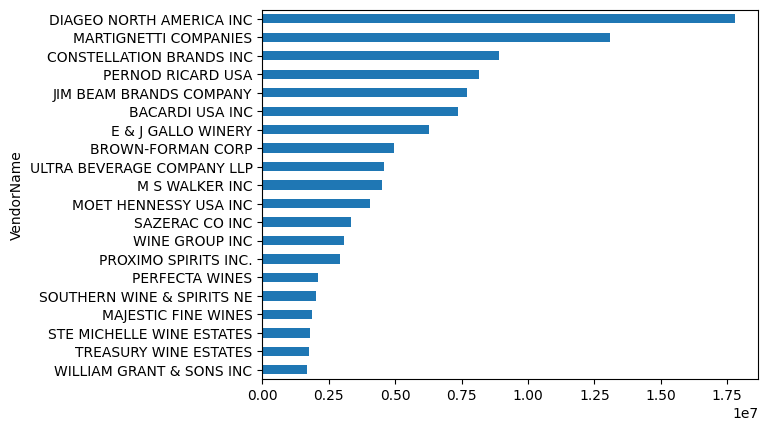

In [272]:
# So right these were just the top Vendors by Total Sales in $ - But Not necessarily the Most Profitable Vendors so lets find those out.

# We must use the Gross Profit 
# --> Gross Profit = Total Sales in $ - Total Purchase in $
# --> Profit Margin = Net Profit/Revenue*100 -- our efficient markets 

top_VENs_byGP = df.groupby("VendorName")["Gross_Profit"].sum().nlargest(20)

top_VENs_byGP.plot(kind="barh")
plt.gca().invert_yaxis()

In [273]:
top_VENs_byGP

VendorName
DIAGEO NORTH AMERICA INC      1.778004e+07
MARTIGNETTI COMPANIES         1.309843e+07
CONSTELLATION BRANDS INC      8.893216e+06
PERNOD RICARD USA             8.155453e+06
JIM BEAM BRANDS COMPANY       7.695470e+06
BACARDI USA INC               7.380987e+06
E & J GALLO WINERY            6.264167e+06
BROWN-FORMAN CORP             4.947179e+06
ULTRA BEVERAGE COMPANY LLP    4.592032e+06
M S WALKER INC                4.500249e+06
MOET HENNESSY USA INC         4.072184e+06
SAZERAC CO INC                3.333810e+06
WINE GROUP INC                3.081857e+06
PROXIMO SPIRITS INC.          2.927273e+06
PERFECTA WINES                2.114245e+06
SOUTHERN WINE & SPIRITS NE    2.004754e+06
MAJESTIC FINE WINES           1.868760e+06
STE MICHELLE WINE ESTATES     1.812754e+06
TREASURY WINE ESTATES         1.761344e+06
WILLIAM GRANT & SONS INC      1.674484e+06
Name: Gross_Profit, dtype: float64

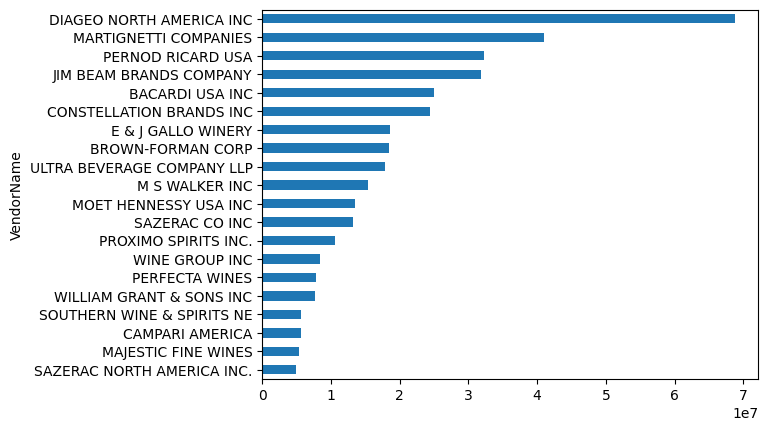

In [93]:
yo= df.groupby("VendorName")["Total_Sales_in_Dollars"].sum().nlargest(20)

yo.plot(kind="barh")
plt.gca().invert_yaxis()

# SO when it come to top 5 when we're going by Total Sales in Dollars($) 
#DIAGEO NORTH AMERICA INC    6.873983e+07 
#MARTIGNETTI COMPANIES       4.096012e+07
#PERNOD RICARD USA           3.227954e+07
#JIM BEAM BRANDS COMPANY     3.189862e+07
#BACARDI USA INC             2.500537e+07

In [ ]:
# So that above was the total sales in $ - nlargest-top 10 - 

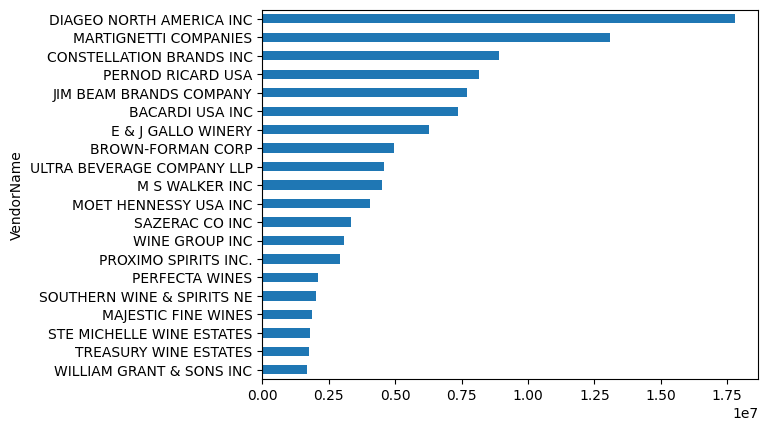

In [94]:
# Now we must go by not the total sales in $ - but Gross Profit

nig = df.groupby("VendorName")["Gross_Profit"].sum().nlargest(20)

nig.plot(kind="barh")
plt.gca().invert_yaxis()

# Top 5 Vendor Names When we look at Gross Profit:
# DIAGEO NORTH AMERICA INC    1.778004e+07
# MARTIGNETTI COMPANIES       1.309843e+07
# CONSTELLATION BRANDS INC    8.893216e+06
# PERNOD RICARD USA           8.155453e+06
# JIM BEAM BRANDS COMPANY     7.695470e+06

In [ ]:
# SO when it come to top 5 when we're going by Total Sales in Dollars($) 
#DIAGEO NORTH AMERICA INC    6.873983e+07 
#MARTIGNETTI COMPANIES       4.096012e+07
#PERNOD RICARD USA           3.227954e+07
#JIM BEAM BRANDS COMPANY     3.189862e+07
#BACARDI USA INC             2.500537e+07


# Top 5 Vendor Names When we look at Gross Profit:
# DIAGEO NORTH AMERICA INC    1.778004e+07
# MARTIGNETTI COMPANIES       1.309843e+07
# CONSTELLATION BRANDS INC    8.893216e+06
# PERNOD RICARD USA           8.155453e+06
# JIM BEAM BRANDS COMPANY     7.695470e+06


# BASIC Insights:
# We can see FOR EG; that CONSTELLATION BRANDS INC is not even in top 5 when it comes to total sales 
# but when it comes to Gross Profit it is in the top 3. 
# AND that #DIAGEO NORTH AMERICA INC and MARTIGNETTI COMPANIES are top 2 in both total sales in ($)
# AND Also in top 2 when it comes to Gross Profit.


In [277]:
#3 PROFIT MARGIN DISTRIBUTION

df["Profit_Margin"].describe()

count    10692.000000
mean       -15.620770
std        443.555329
min     -23730.638953
25%         13.324515
50%         30.405457
75%         39.956135
max         99.716657
Name: Profit_Margin, dtype: float64

<Axes: xlabel='Profit_Margin', ylabel='VendorName'>

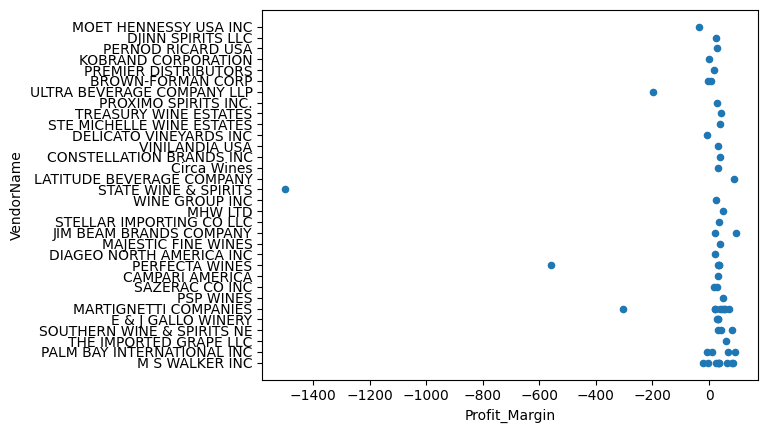

In [ ]:
som = df.head(60)

som.plot(kind="scatter", x="Profit_Margin", y="VendorName")

In [284]:
som[["VendorName", "Profit_Margin"]].values

array([['M S WALKER INC', 31.5035003889321],
       ['PALM BAY INTERNATIONAL INC', 92.64133066638594],
       ['M S WALKER INC', 63.964030232258764],
       ['THE IMPORTED GRAPE LLC', 59.92127393093576],
       ['SOUTHERN WINE & SPIRITS NE', 42.33806336144666],
       ['E & J GALLO WINERY', 30.640178836260535],
       ['MARTIGNETTI COMPANIES', 52.6601969019932],
       ['PSP WINES', 47.99489509136314],
       ['M S WALKER INC', 23.81311615945132],
       ['SAZERAC CO INC', 29.502303112009663],
       ['MARTIGNETTI COMPANIES', -302.6711185308848],
       ['CAMPARI AMERICA', 32.30091017569141],
       ['PERFECTA WINES', 34.5153830770661],
       ['PALM BAY INTERNATIONAL INC', -8.532619479204842],
       ['SOUTHERN WINE & SPIRITS NE', 31.973691801765412],
       ['DIAGEO NORTH AMERICA INC', 20.63446699056874],
       ['MARTIGNETTI COMPANIES', 57.75860944459312],
       ['M S WALKER INC', 82.5030376670717],
       ['PERFECTA WINES', 34.65857698316675],
       ['MAJESTIC FINE WINES', 38.659

In [153]:
df["VendorName"].nunique()

128

<Axes: xlabel='Profit_Margin', ylabel='VendorName'>

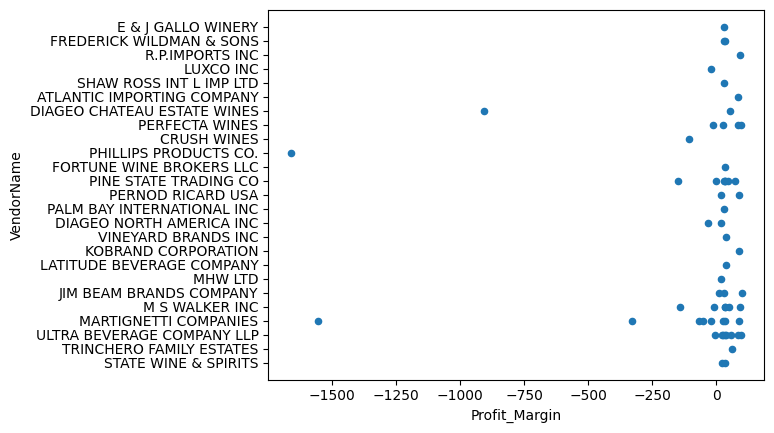

In [155]:
lo = df.tail(60)

lo.plot(kind="scatter", x="Profit_Margin", y="VendorName")

In [285]:
lo[["VendorName", "Profit_Margin"]].values

array([['STATE WINE & SPIRITS', 34.21256647920489],
       ['TRINCHERO FAMILY ESTATES', 60.025329572275645],
       ['ULTRA BEVERAGE COMPANY LLP', 34.71162279046885],
       ['MARTIGNETTI COMPANIES', 90.61839933917163],
       ['M S WALKER INC', 35.51106427818757],
       ['JIM BEAM BRANDS COMPANY', 8.922935829309262],
       ['MARTIGNETTI COMPANIES', -1555.3230209281162],
       ['JIM BEAM BRANDS COMPANY', 29.99999111996242],
       ['M S WALKER INC', 34.02926693108387],
       ['MARTIGNETTI COMPANIES', -67.26133344892283],
       ['MHW LTD', 18.13183511597166],
       ['LATITUDE BEVERAGE COMPANY', 39.23428517993815],
       ['M S WALKER INC', 92.99715707802297],
       ['KOBRAND CORPORATION', 88.56945744838121],
       ['MARTIGNETTI COMPANIES', -18.981750434864004],
       ['STATE WINE & SPIRITS', 22.539662315500063],
       ['VINEYARD BRANDS INC', 38.859324843075036],
       ['JIM BEAM BRANDS COMPANY', 99.54484424215299],
       ['ULTRA BEVERAGE COMPANY LLP', -4.566050888811437],
  

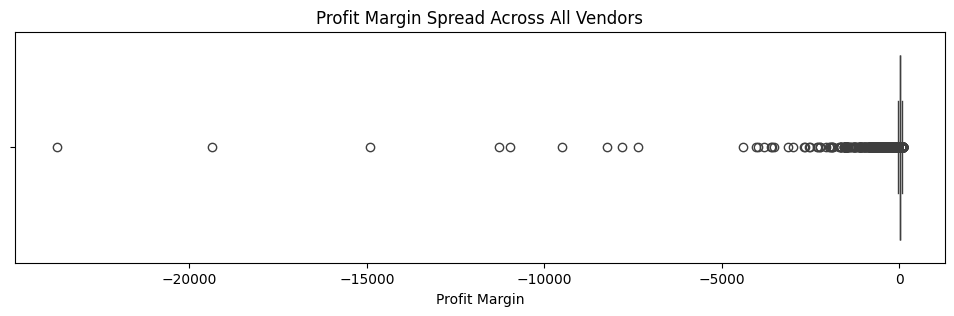

In [ ]:
plt.figure(figsize=(12,3))
sns.boxplot(x=df["Profit_Margin"])
plt.title("Profit Margin Spread Across All Vendors")
plt.xlabel("Profit Margin")
plt.show()

# There's clearly some strong outliers - roughly 5-9 of Outliers

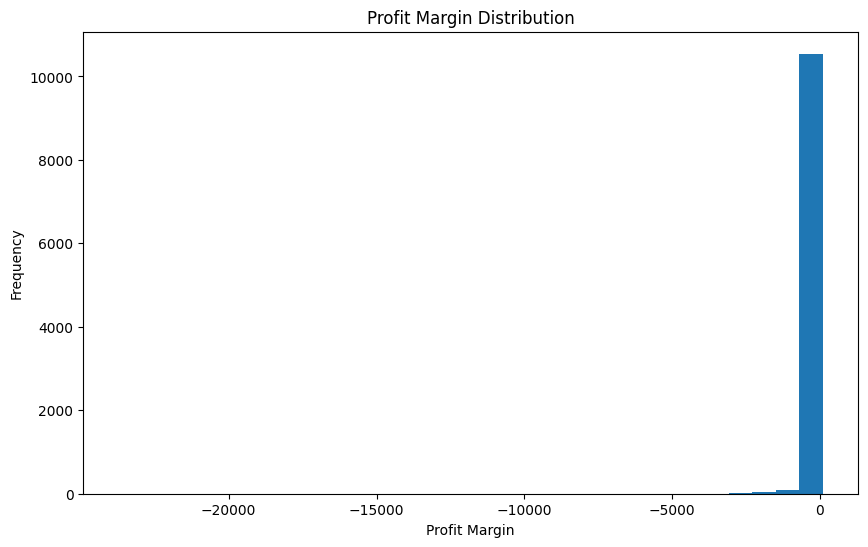

In [169]:
plt.figure(figsize=(10,6))
df["Profit_Margin"].plot(kind="hist", bins=30)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.show()


In [ ]:
'''
 FIFTH — LET’S STOP WASTING TIME ON THIS. HERE’S OUR CLEAN CONCLUSION
✔ Profit margin is tightly concentrated near 0

→ Vendors overall give low profitability.

✔ A few vendors show very low or negative profit margins

→ They are loss-making outliers we need to investigate.

✔ The distribution plot job is DONE

Now we move to the actual vendor-level insights. 
'''

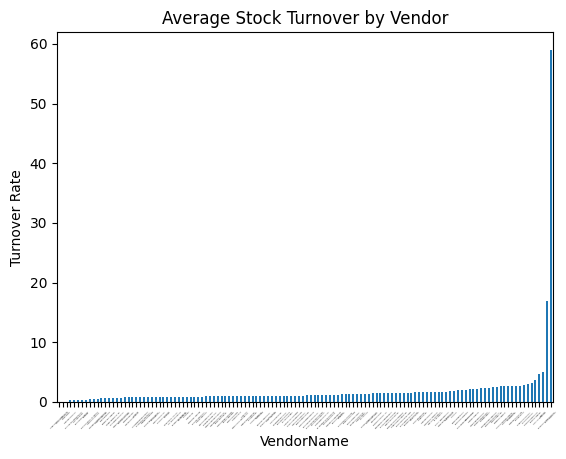

In [ ]:
ST = df.groupby("VendorName")["Stock_Turnover"].mean().sort_values()

ST.plot(kind="bar")
plt.title("Average Stock Turnover by Vendor")
plt.ylabel("Turnover Rate")
plt.xticks(rotation=45, size=1)
plt.show()

# RIGHT - this is very unclear no clue which vendor's what so we gotta do top 25 and bottom 25.

In [383]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

In [395]:
df.groupby("Description")["Gross_Profit"].mean().describe()

count      9651.000000
mean       8728.053891
std       25946.936099
min      -52002.780000
25%          48.000000
50%        1305.440000
75%        7514.685000
max      865935.420000
Name: Gross_Profit, dtype: float64

In [394]:
df.groupby("Description")["Gross_Profit"].sum().describe()

count    9.651000e+03
mean     1.344103e+04
std      6.645334e+04
min     -5.200278e+04
25%      4.835000e+01
50%      1.344940e+03
75%      7.904580e+03
max      2.139962e+06
Name: Gross_Profit, dtype: float64

In [392]:
df.groupby("Description")["Gross_Profit"].sum().sort_values(ascending=False).head(5)

Description
Jack Daniels No 7 Black    2139961.60
Grey Goose Vodka           1946003.09
Tito's Handmade Vodka      1781028.26
Capt Morgan Spiced Rum     1733386.12
Absolut 80 Proof           1599051.94
Name: Gross_Profit, dtype: float64

In [397]:
df.groupby("Description")["Gross_Profit"].sum().sort_values().head(5)

Description
Kilbeggan Irish Whiskey     -52002.78
Remy Martin XO Excellence   -38161.69
Whistle Pig Boss Hog Rye    -33426.71
Integre Vodka               -30984.58
Westland Trinity 3 Pack     -29150.98
Name: Gross_Profit, dtype: float64

In [418]:
df.groupby("Description")["Gross_Profit"].sum().sort_values().head(1976)

Description
Kilbeggan Irish Whiskey        -52002.78
Remy Martin XO Excellence      -38161.69
Whistle Pig Boss Hog Rye       -33426.71
Integre Vodka                  -30984.58
Westland Trinity 3 Pack        -29150.98
                                  ...   
Vinchio Vaglio Barbera             -0.88
Grape & Vine Merlot                -0.73
Duca di Salaparuta Platino I       -0.72
Cadet D'Oc Cab Svgn Rthschld       -0.67
Pepperjack Barossa Red              0.04
Name: Gross_Profit, Length: 1976, dtype: float64

In [415]:
df.groupby("VendorName")["Gross_Profit"].sum().sort_values().head(16)

VendorName
ADAMBA IMPORTS INTL INC         -9194.03
BLACK COVE BEVERAGES            -8208.19
VINEYARD BRANDS LLC             -6627.55
IRA GOLDMAN AND WILLIAMS, LLP   -4365.30
HIGHLAND WINE MERCHANTS LLC     -3966.64
UNCORKED                        -1874.92
GILMANTON WINERY & VINEYARD     -1555.44
LOYAL DOG WINERY                -1209.54
TAMWORTH DISTILLING             -1015.32
APPOLO VINEYARDS LLC             -782.78
STARK BREWING COMPANY            -589.50
SOUTHERN GLAZERS W&S OF NE       -363.80
TRUETT HURST                     -221.65
LAUREATE IMPORTS CO              -140.94
AAPER ALCOHOL & CHEMICAL CO      -105.07
CAPSTONE INTERNATIONAL            192.23
Name: Gross_Profit, dtype: float64

In [295]:
df.groupby("VendorName")["Stock_Turnover"].mean().describe()


count    128.000000
mean       1.909349
std        5.330635
min        0.000000
25%        0.859337
50%        1.069105
75%        1.636769
max       59.000000
Name: Stock_Turnover, dtype: float64

In [419]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

In [420]:
df.groupby("VendorName")["Gross_Profit"].sum().describe()

count    1.280000e+02
mean     1.013433e+06
std      2.521472e+06
min     -9.194030e+03
25%      3.753860e+03
50%      3.292304e+04
75%      7.801283e+05
max      1.778004e+07
Name: Gross_Profit, dtype: float64

In [426]:
Median_50th = 33900

In [428]:
Vendor_GPSUM = df.groupby("VendorName")["Gross_Profit"].sum()

In [429]:
Total_Below = Vendor_GPSUM[Vendor_GPSUM < Median_50th]

In [431]:
Total_Below.count()

np.int64(65)

In [432]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

In [433]:
df["Stock_Turnover"].sum().describe()

AttributeError: 'numpy.float64' object has no attribute 'describe'

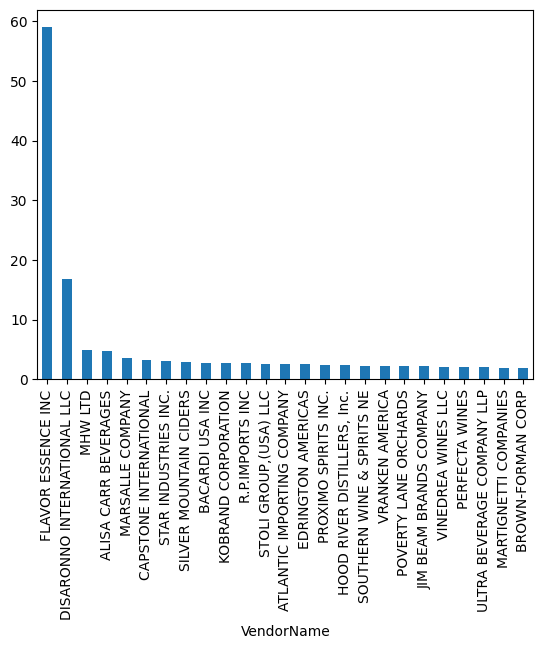

VendorName
FLAVOR ESSENCE INC             59.000000
DISARONNO INTERNATIONAL LLC    16.890895
MHW LTD                         4.936248
ALISA CARR BEVERAGES            4.695963
MARSALLE COMPANY                3.642586
CAPSTONE INTERNATIONAL          3.250000
STAR INDUSTRIES INC.            3.065315
SILVER MOUNTAIN CIDERS          2.882353
BACARDI USA INC                 2.723568
KOBRAND CORPORATION             2.714364
R.P.IMPORTS INC                 2.657574
STOLI GROUP,(USA) LLC           2.633052
ATLANTIC IMPORTING COMPANY      2.603179
EDRINGTON AMERICAS              2.598758
PROXIMO SPIRITS INC.            2.487896
HOOD RIVER DISTILLERS, Inc.     2.466746
SOUTHERN WINE & SPIRITS NE      2.297621
VRANKEN AMERICA                 2.278526
POVERTY LANE ORCHARDS           2.249094
JIM BEAM BRANDS COMPANY         2.243166
VINEDREA WINES LLC              2.146341
PERFECTA WINES                  2.084766
ULTRA BEVERAGE COMPANY LLP      1.990546
MARTIGNETTI COMPANIES           1.940163
BROWN

In [205]:
STH = df.groupby("VendorName")["Stock_Turnover"].mean().nlargest(25)

STH.plot(kind="bar") 
plt.show()
# SO this gives us an idea on our TOP 25 Vendors when it comes it Stock Turnover - 
# Quickly We see that FLAVOUR ESSENCE INC has very hight Stock turnover - above 55.0-nearly-60.0 
# whereas the higesht second is much-much lower DISARONNO INTERNATIONAL LLC has between 15.0 to 20.0
# AND the rest of em are below 10 - mostly all below 5.0 as well.

STH

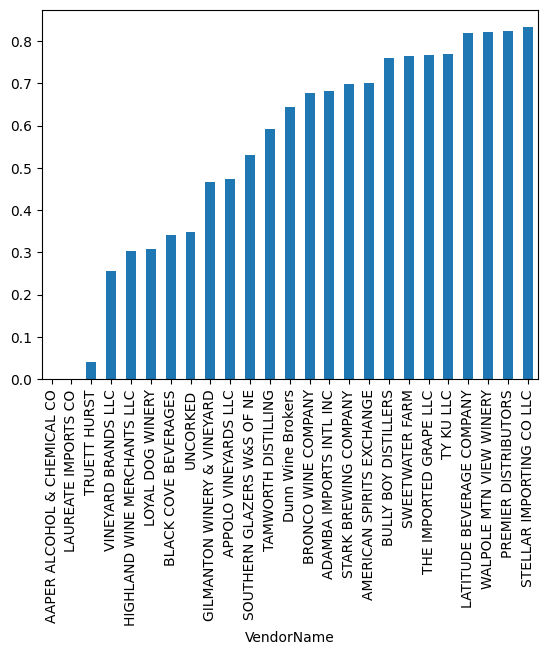

VendorName
AAPER ALCOHOL & CHEMICAL CO    0.000000
LAUREATE IMPORTS CO            0.000000
TRUETT HURST                   0.041667
VINEYARD BRANDS LLC            0.256241
HIGHLAND WINE MERCHANTS LLC    0.303662
LOYAL DOG WINERY               0.308333
BLACK COVE BEVERAGES           0.340588
UNCORKED                       0.347699
GILMANTON WINERY & VINEYARD    0.465819
APPOLO VINEYARDS LLC           0.472727
SOUTHERN GLAZERS W&S OF NE     0.530325
TAMWORTH DISTILLING            0.592584
Dunn Wine Brokers              0.644136
BRONCO WINE COMPANY            0.677173
ADAMBA IMPORTS INTL INC        0.681277
STARK BREWING COMPANY          0.698020
AMERICAN SPIRITS EXCHANGE      0.701389
BULLY BOY DISTILLERS           0.760235
SWEETWATER FARM                0.764372
THE IMPORTED GRAPE LLC         0.766827
TY KU LLC                      0.768647
LATITUDE BEVERAGE COMPANY      0.819172
WALPOLE MTN VIEW WINERY        0.820548
PREMIER DISTRIBUTORS           0.823603
STELLAR IMPORTING CO LLC     

In [ ]:
STL = df.groupby("VendorName")["Stock_Turnover"].mean().nsmallest(25)

STL.plot(kind="bar")
plt.show()

STL

# SO we can see that AAPER ALCOHOL & CHEMICAL CO has 0 stock turnover and LAUREATE IMPORTS CO too has 0 stock turnover. 
# Then 3rd lowest is TRUETT HURST with stock turnover of -> 0.041667. 
# But all the rest of the 22 in (bottom 25 are still above 0 less than 1.0).


In [ ]:
(df["Stock_Turnover"] < 0).any(axis=0) # Right so this confirms it - no vlaues below 0 in the Stock_Turnover Column

np.False_

In [287]:
# NOW we look at 5. Bulk Purchase Impact on Unit Cost

# units puchased vs units cost


df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio', 'Unit_Cost'],
      dtype='object')

<Axes: xlabel='Total_Purchase_Quantity', ylabel='Unit_Cost'>

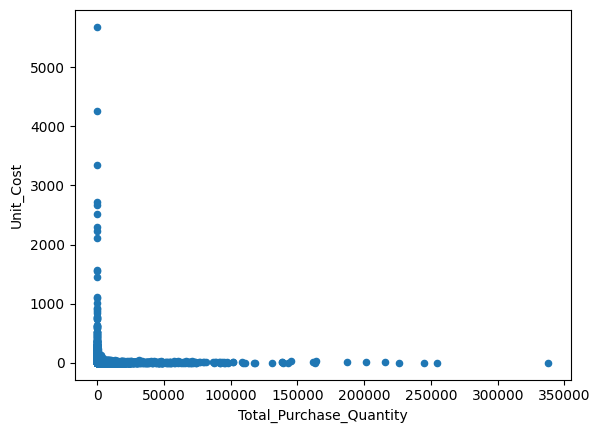

In [220]:
df["Unit_Cost"] = df["Total_Purchase_in_Dollars"]/df["Total_Purchase_Quantity"]

df.plot(kind="scatter", x="Total_Purchase_Quantity", y="Unit_Cost")


In [291]:
df[["Total_Purchase_Quantity", "Unit_Cost"]].values

array([[1.500e+01, 6.164e+01],
       [7.000e+00, 6.291e+01],
       [1.200e+01, 1.633e+01],
       ...,
       [1.171e+03, 7.940e+00],
       [2.477e+03, 1.080e+01],
       [9.368e+03, 5.330e+00]], shape=(10692, 2))

In [227]:
(df["Unit_Cost"] > 6000).any(axis=0)

np.False_

In [229]:
df["Total_Purchase_Quantity"].describe()

count     10692.000000
mean       3140.886831
std       11095.086769
min           1.000000
25%          36.000000
50%         262.000000
75%        1975.750000
max      337660.000000
Name: Total_Purchase_Quantity, dtype: float64

In [230]:
# 25% - 36.000000
# 50% - 262.000000
# 75% - 1975.750000 


In [231]:
df["Total_Purchase_Quantity"].describe()

count     10692.000000
mean       3140.886831
std       11095.086769
min           1.000000
25%          36.000000
50%         262.000000
75%        1975.750000
max      337660.000000
Name: Total_Purchase_Quantity, dtype: float64

In [232]:
df["Unit_Cost"].describe()

count    10692.000000
mean        24.385303
std        109.269375
min          0.360000
25%          6.840000
50%         10.455000
75%         19.482500
max       5681.810000
Name: Unit_Cost, dtype: float64

In [233]:
'''
Updated conclusion for Bulk Purchase Impact:

Small quantities → high unit cost:

Most purchases ≤ 262 units (50th percentile) → unit cost is mostly $6–$20, but some extreme high-cost outliers exist.

Large quantities → lower unit cost:

Purchases >1975 units (75th percentile) → unit cost drops toward lower end of typical range.

Skewed distribution:

Extreme unit costs (up to $5681) are rare and distort the mean.

These likely correspond to tiny purchases (1–2 units) or mispriced data.

Simple actionable insight:

“Bulk purchases are cost-effective: typical small orders (<262 units) have higher and more variable unit costs, 
while large purchases (>1975 units) enjoy lower unit costs. 
Extreme outliers exist, which should be reviewed for data anomalies or special pricing cases.”

'''

'\nUpdated conclusion for Bulk Purchase Impact:\n\nSmall quantities → high unit cost:\n\nMost purchases ≤ 262 units (50th percentile) → unit cost is mostly $6–$20, but some extreme high-cost outliers exist.\n\nLarge quantities → lower unit cost:\n\nPurchases >1975 units (75th percentile) → unit cost drops toward lower end of typical range.\n\nSkewed distribution:\n\nExtreme unit costs (up to $5681) are rare and distort the mean.\n\nThese likely correspond to tiny purchases (1–2 units) or mispriced data.\n\nSimple actionable insight:\n\n“Bulk purchases are cost-effective: typical small orders (<262 units) have higher and more variable unit costs, \nwhile large purchases (>1975 units) enjoy lower unit costs. \nExtreme outliers exist, which should be reviewed for data anomalies or special pricing cases.”\n\n'

In [297]:
# Sales to Purchase Ratio by Vendor

SRV = df.groupby("VendorName")["Sales_to_Purchase_Ratio"].mean().sort_values()

In [298]:
df.groupby("VendorName")["Sales_to_Purchase_Ratio"].mean().describe()

count    128.000000
mean       2.734610
std        7.778669
min        0.000000
25%        1.257393
50%        1.572257
75%        2.332786
max       86.730000
Name: Sales_to_Purchase_Ratio, dtype: float64

In [243]:
SRVT = df.groupby("VendorName")["Sales_to_Purchase_Ratio"].mean().nlargest(25)

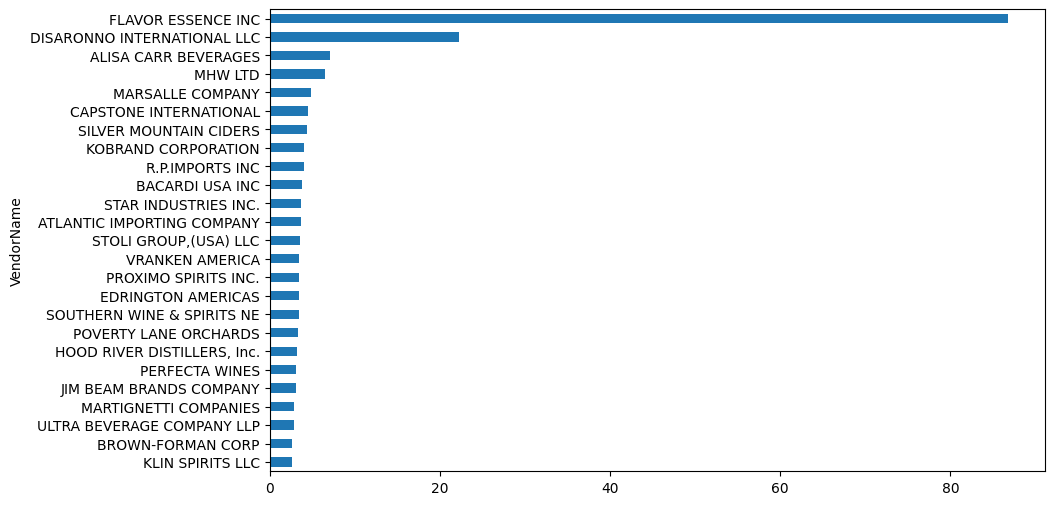

VendorName
FLAVOR ESSENCE INC             86.730000
DISARONNO INTERNATIONAL LLC    22.262418
ALISA CARR BEVERAGES            7.146990
MHW LTD                         6.451163
MARSALLE COMPANY                4.880914
CAPSTONE INTERNATIONAL          4.518119
SILVER MOUNTAIN CIDERS          4.437808
KOBRAND CORPORATION             4.087430
R.P.IMPORTS INC                 3.983989
BACARDI USA INC                 3.745706
STAR INDUSTRIES INC.            3.715440
ATLANTIC IMPORTING COMPANY      3.638055
STOLI GROUP,(USA) LLC           3.595975
VRANKEN AMERICA                 3.491262
PROXIMO SPIRITS INC.            3.484297
EDRINGTON AMERICAS              3.483755
SOUTHERN WINE & SPIRITS NE      3.473088
POVERTY LANE ORCHARDS           3.355391
HOOD RIVER DISTILLERS, Inc.     3.224477
PERFECTA WINES                  3.136089
JIM BEAM BRANDS COMPANY         3.077886
MARTIGNETTI COMPANIES           2.914603
ULTRA BEVERAGE COMPANY LLP      2.887463
BROWN-FORMAN CORP               2.670760
KLIN 

In [ ]:
SRVT.plot(kind="barh", figsize=(10,6))
plt.gca().invert_yaxis()
plt.show()

# SHOW values
SRVT

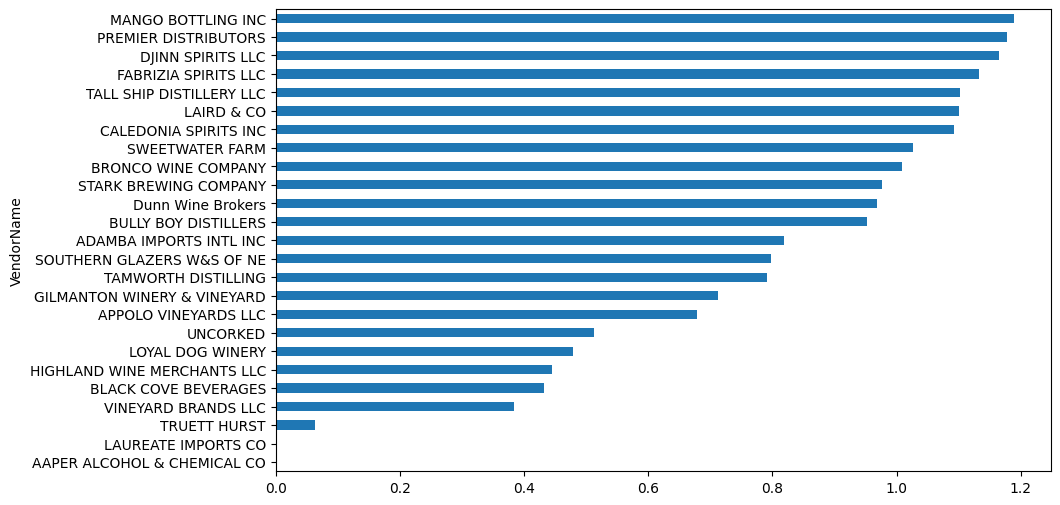

VendorName
AAPER ALCOHOL & CHEMICAL CO    0.000000
LAUREATE IMPORTS CO            0.000000
TRUETT HURST                   0.063345
VINEYARD BRANDS LLC            0.384433
BLACK COVE BEVERAGES           0.432551
HIGHLAND WINE MERCHANTS LLC    0.444776
LOYAL DOG WINERY               0.478826
UNCORKED                       0.512416
APPOLO VINEYARDS LLC           0.678001
GILMANTON WINERY & VINEYARD    0.713111
TAMWORTH DISTILLING            0.791826
SOUTHERN GLAZERS W&S OF NE     0.797713
ADAMBA IMPORTS INTL INC        0.818672
BULLY BOY DISTILLERS           0.953068
Dunn Wine Brokers              0.968233
STARK BREWING COMPANY          0.977293
BRONCO WINE COMPANY            1.008657
SWEETWATER FARM                1.026321
CALEDONIA SPIRITS INC          1.092224
LAIRD & CO                     1.099921
TALL SHIP DISTILLERY LLC       1.102315
FABRIZIA SPIRITS LLC           1.132875
DJINN SPIRITS LLC              1.164295
PREMIER DISTRIBUTORS           1.177070
MANGO BOTTLING INC           

In [251]:
SRVS = df.groupby("VendorName")["Sales_to_Purchase_Ratio"].mean().nsmallest(25)

SRVS.plot(kind="barh", figsize=(10, 6))
plt.show()


#SHOW values
SRVS

In [248]:
df["Sales_to_Purchase_Ratio"].describe()

count    10692.000000
mean         2.504390
std          8.459067
min          0.000000
25%          1.153729
50%          1.436894
75%          1.665449
max        352.928571
Name: Sales_to_Purchase_Ratio, dtype: float64

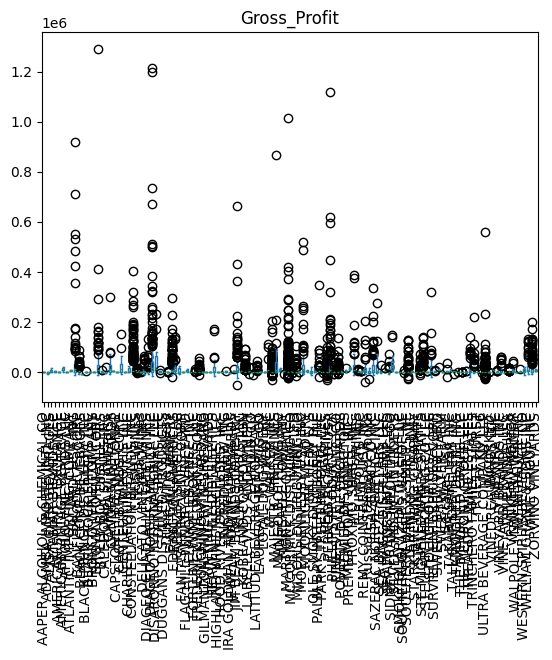

Text(0.5, 0.98, ' ')

<Figure size 640x480 with 0 Axes>

In [ ]:
# 7. Profitability Variance Between Vendors

# VendorName by Gross_Profit  

df.plot(kind="box", column= "Gross_Profit", by="VendorName", rot=90)
plt.show()
plt.suptitle("") 

In [254]:
df["Gross_Profit"].describe()

count    1.069200e+04
mean     1.213238e+04
std      4.622434e+04
min     -5.200278e+04
25%      5.292000e+01
50%      1.399640e+03
75%      8.660200e+03
max      1.290668e+06
Name: Gross_Profit, dtype: float64

In [441]:
df.groupby("VendorName")["Stock_Turnover"].sum().describe()

count     128.000000
mean      142.570588
std       357.495654
min         0.000000
25%         3.825776
50%        16.412117
75%       108.962505
max      2692.946530
Name: Stock_Turnover, dtype: float64

In [ ]:
df["Stock_Turnover"].describe()

count    10692.000000
mean         1.706793
std          6.020460
min          0.000000
25%          0.807229
50%          0.981529
75%          1.039342
max        274.500000
Name: Stock_Turnover, dtype: float64

In [440]:
df.groupby("VendorName")["Total_Sales_in_Dollars"].describe()

,count,mean,std,min,25%,50%,75%,max
VendorName,,,,,,,,
AAPER ALCOHOL & CHEMICAL CO,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
ADAMBA IMPORTS INTL INC,3.0,22525.406667,38406.623449,0.00,352.2650,704.530,33788.1100,66871.69
ALISA CARR BEVERAGES,13.0,8737.706154,5835.866008,1119.84,3509.7400,9119.240,10898.9100,19078.41
ALTAMAR BRANDS LLC,2.0,7853.405000,10597.444685,359.88,4106.6425,7853.405,11600.1675,15346.93
AMERICAN SPIRITS EXCHANGE,2.0,859.985000,920.900516,208.81,534.3975,859.985,1185.5725,1511.16
...,...,...,...,...,...,...,...,...
WEIN BAUER INC,6.0,9488.371667,19809.649448,137.88,434.6475,686.250,4178.3025,49726.75
WESTERN SPIRITS BEVERAGE CO,17.0,26062.952941,27056.291680,152.91,7199.4100,16374.600,47354.4100,83086.68
WILLIAM GRANT & SONS INC,81.0,94262.077901,139692.989630,167.88,9148.1700,34674.740,103979.2000,632474.53


In [ ]:
top_vendors = df.groupby("VendorName")["Total_Sales_in_Dollars"].sum().nlargest(15).index
df_top = df[df["VendorName"].isin(top_vendors)]


# so by this what im guess it means is - whichever vendor is in the top 15 according to Total_Sales_in_Dollars 
# - whichever is in the top 15 according to our condition set above (Total_Sales_in_Dollars) 
# - for those ones --> we want the graph - Gross Profit by the those 15 vendor names

In [299]:
df.groupby("VendorName")["Total_Sales_in_Dollars"].sum().describe()

count    1.280000e+02
mean     3.528283e+06
std      9.020532e+06
min      0.000000e+00
25%      3.537288e+04
50%      1.605003e+05
75%      2.539361e+06
max      6.873983e+07
Name: Total_Sales_in_Dollars, dtype: float64

<Figure size 1200x600 with 0 Axes>

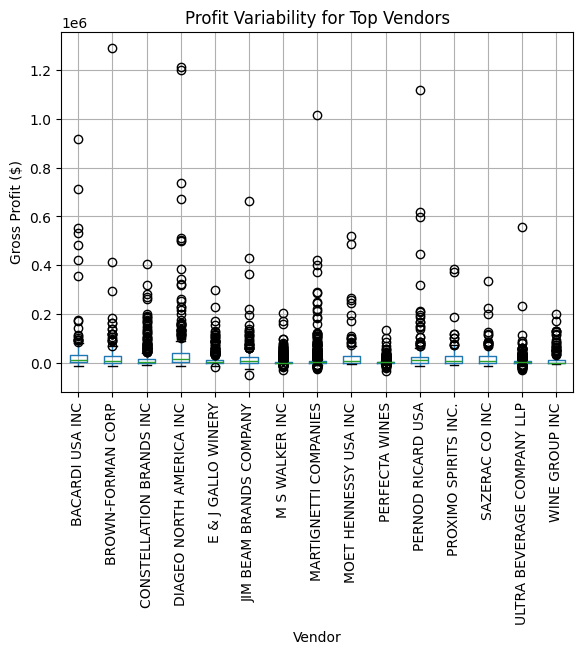

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,Total_Purchase_Quantity,Total_Purchase_in_Dollars,Total_Sales_Quantity,Total_Sales_in_Dollars,Total_Sales_Price,Total_Excise_Tax,Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sales_to_Purchase_Ratio,Unit_Cost
0,9552,M S WALKER INC,10937,Grahams 30-Yr Tawny Port,61.64,89.99,750.0,15.0,924.60,15.0,1349.85,899.90,1.66,55551.82,425.25,31.503500,1.000000,1.459929,61.64
2,9552,M S WALKER INC,36571,Matanzas Creek Chard Sonoma,16.33,25.99,750.0,12.0,195.96,21.0,543.79,334.87,2.34,55551.82,347.83,63.964030,1.750000,2.775005,16.33
5,3252,E & J GALLO WINERY,6173,Gallo Fairbanks Red Port,5.51,7.99,1500.0,4524.0,24927.24,4498.0,35939.02,21892.60,1004.20,61966.91,11011.78,30.640179,0.994253,1.441757,5.51
6,4425,MARTIGNETTI COMPANIES,27097,Vieux Telegraphe Chtnf Pape,51.72,88.99,750.0,116.0,5999.52,169.0,12673.31,7349.02,18.76,144929.24,6673.79,52.660197,1.456897,2.112387,51.72
8,9552,M S WALKER INC,24670,Freemark Abbey Cab Svgn Ruth,47.61,69.99,750.0,84.0,3999.24,75.0,5249.25,2659.62,8.38,55551.82,1250.01,23.813116,0.892857,1.312562,47.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,9552,M S WALKER INC,25030,Cardinale 12 Cab Svgn Napa,152.02,224.99,750.0,24.0,3648.48,6.0,1499.94,249.99,0.68,55551.82,-2148.54,-143.241730,0.250000,0.411114,152.02
10687,10754,PERFECTA WINES,25381,Selbach-Oster Riesling,11.64,16.99,750.0,6.0,69.84,89.0,1512.11,1121.34,9.83,28720.52,1442.27,95.381288,14.833333,21.651060,11.64
10689,9552,M S WALKER INC,25544,Tilia Bonarda Mendoza,7.94,11.99,750.0,1171.0,9297.74,807.0,8553.93,4977.35,89.61,55551.82,-743.81,-8.695535,0.689155,0.920001,7.94
10690,10754,PERFECTA WINES,26442,Fortant Heritage Lang Rouge,10.80,15.99,750.0,2477.0,26751.60,1462.0,23377.38,11688.69,162.81,28720.52,-3374.22,-14.433696,0.590230,0.873868,10.80


In [270]:
plt.figure(figsize=(12,6))
df_top.boxplot(column="Gross_Profit", by="VendorName", rot= 90)
plt.title("Profit Variability for Top Vendors")
plt.suptitle("")   # removes the default pandas "Boxplot grouped by ..."
plt.xlabel("Vendor")
plt.ylabel("Gross Profit ($)")
plt.show()


# SHOW Values
df_top

In [269]:
top_vendors = df.groupby("VendorName")["Total_Sales_in_Dollars"].sum().nlargest(15)

top_Vendors

VendorName
DIAGEO NORTH AMERICA INC      6.873983e+07
MARTIGNETTI COMPANIES         4.096012e+07
PERNOD RICARD USA             3.227954e+07
JIM BEAM BRANDS COMPANY       3.189862e+07
BACARDI USA INC               2.500537e+07
CONSTELLATION BRANDS INC      2.446713e+07
E & J GALLO WINERY            1.855377e+07
BROWN-FORMAN CORP             1.847661e+07
ULTRA BEVERAGE COMPANY LLP    1.780265e+07
M S WALKER INC                1.543607e+07
MOET HENNESSY USA INC         1.354518e+07
SAZERAC CO INC                1.325058e+07
PROXIMO SPIRITS INC.          1.051530e+07
WINE GROUP INC                8.340493e+06
PERFECTA WINES                7.779747e+06
WILLIAM GRANT & SONS INC      7.635228e+06
SOUTHERN WINE & SPIRITS NE    5.704568e+06
CAMPARI AMERICA               5.604628e+06
MAJESTIC FINE WINES           5.375429e+06
SAZERAC NORTH AMERICA INC.    4.964318e+06
Name: Total_Sales_in_Dollars, dtype: float64

In [ ]:
# NOW WE MOVE ONTO...

In [ ]:
'''ANALYSIS - HYPOTHESIS TESTS --> 
    Visual Evidence (scatter plot)

    Descriptive Stats (describe())

    Statistical Test (correlation + optional regression)

    Business Interpretation (the real point)

'''

In [ ]:
# Answering our Big Initial Question: 

'''
For Test #1: Bulk Purchase → Lower Unit Cost, any full analytical test has 4 layers:

Visual Evidence (scatter plot)

Descriptive Stats (describe())

Statistical Test (correlation + optional regression)
    A. Pearson correlation
    B. Spearman correlation
    Maybe C. Optional regression
    
Business Interpretation (the real point)

ALREADY completed Layers 1 & 2.

✔ Scatter plot
✔ describe() for Quantity
✔ describe() for Unit Cost

These cover the exploratory beginning of the test. 
'''

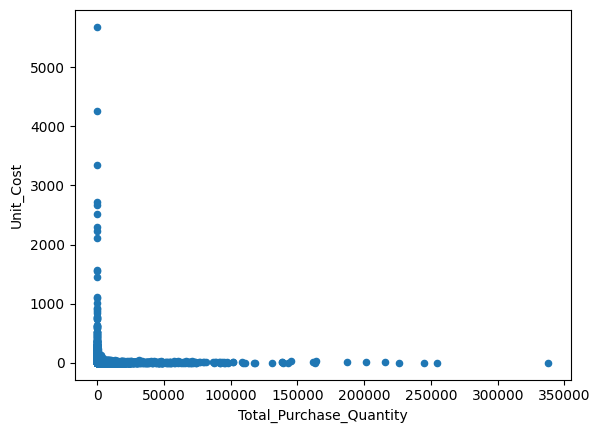

In [302]:
#df["Unit_Cost"] = df["Total_Purchase_in_Dollars"]/df["Total_Purchase_Quantity"]

df.plot(kind="scatter", x="Total_Purchase_Quantity", y="Unit_Cost")
plt.show()

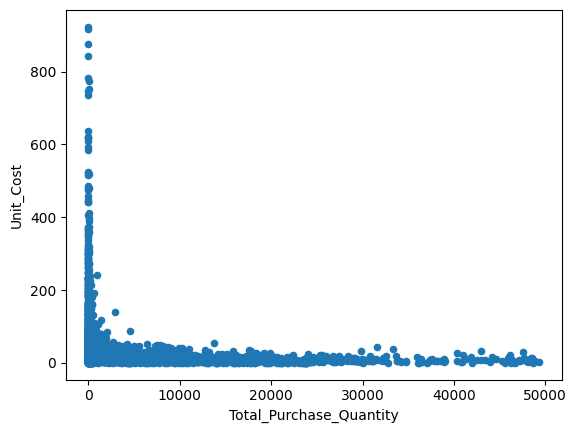

In [305]:
df_filtered = df[(df["Unit_Cost"] < 1000) & (df["Total_Purchase_Quantity"] < 50000)]

df_filtered.plot(
    kind="scatter",
    x="Total_Purchase_Quantity",
    y="Unit_Cost"
)
plt.show()


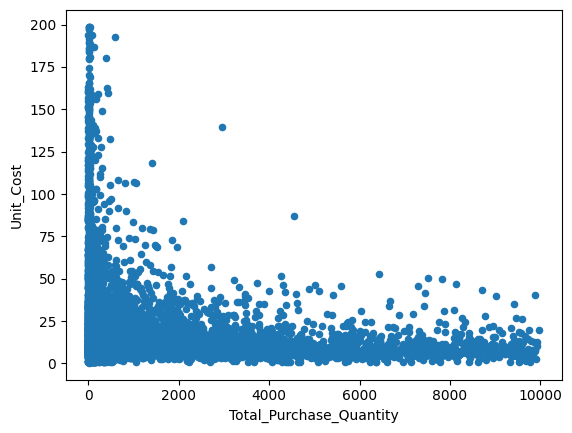

In [306]:
df_filtered_1 = df[(df["Unit_Cost"] < 200) & (df["Total_Purchase_Quantity"] < 10000)]

df_filtered_1.plot(
    kind="scatter",
    x="Total_Purchase_Quantity",
    y="Unit_Cost"
)
plt.show()


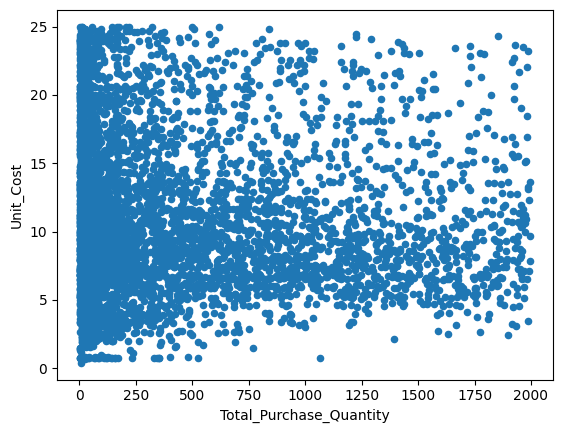

In [307]:
df_filtered_2 = df[(df["Unit_Cost"] < 25) & (df["Total_Purchase_Quantity"] < 2000)]

df_filtered_2.plot(
    kind="scatter",
    x="Total_Purchase_Quantity",
    y="Unit_Cost"
)
plt.show()


In [303]:
df["Total_Purchase_Quantity"].describe()

count     10692.000000
mean       3140.886831
std       11095.086769
min           1.000000
25%          36.000000
50%         262.000000
75%        1975.750000
max      337660.000000
Name: Total_Purchase_Quantity, dtype: float64

In [304]:
df["Unit_Cost"].describe()

count    10692.000000
mean        24.385303
std        109.269375
min          0.360000
25%          6.840000
50%         10.455000
75%         19.482500
max       5681.810000
Name: Unit_Cost, dtype: float64

In [ ]:
'''
STEP 1 — Visual Pattern (DONE)

Scatter plot already shows an L-shape → bulk discounts exist.

STEP 2 — Descriptive Stats (DONE)

You ran .describe() for Quantity & Unit Cost → perfect. 
'''

In [ ]:
'''
STEP 3 NOW

Statistical Test (correlation + optional regression)
    A. Pearson correlation
    B. Spearman correlation
    Maybe C. Optional regression '''

In [308]:

df["Total_Purchase_Quantity"].corr(df["Unit_Cost"], method="pearson")

np.float64(-0.03834619493383716)

In [316]:
df["Total_Purchase_Quantity"].rank().corr(
    df["Unit_Cost"].rank(),
    method="pearson"
)


np.float64(-0.27446019298245067)

In [ ]:
'''
 TEST #2 — High Sales vs High Profitability
Business Question

Do vendors with high Total Sales also deliver high Gross Profit — or are some vendors “revenue traps”?

A revenue trap vendor = looks big on sales but gives terrible margins. 
'''

# Right so the three things we're looking at in the dataset are:
# Vendor Name, 
# Total Sales,
# Gross Profit

In [319]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio', 'Unit_Cost'],
      dtype='object')

In [ ]:
Vendor_VNTG = df.groupby("VendorName").agg(Total_Sales = ("Total_Sales_in_Dollars", sum), Total_Gross_P = ("Gross_Profit", sum)).reset_index()

In [ ]:
Vendor_VNTG[["Total_Sales", "Total_Gross_P"]].corr()


,Total_Sales,Total_Gross_P
Total_Sales,1.000000,0.990721
Total_Gross_P,0.990721,1.000000


In [ ]:
# TEST 3

In [ ]:
''' Test #3: Identify Underperforming Brands (Low Sales / Low Profit SKUs)
Goal:

Find brands that are dragging performance — low sales, low profit, low margins — so the business can make decisions on:

price adjustments

promotions

delisting low-value brands

negotiating better terms with vendors

This is exactly what execs LOVE in a slide. '''

In [ ]:
'''🧪 Method: “Low-Performers = Bottom 20–25% Z-score / Percentile”

We score each brand and identify the ones significantly below normal.

Why not correlation?
Because I'm not measuring relationships.
I am measuring extreme weakness.

So apply a Z-score:

Z < –1.0 → below average

Z < –1.5 → consistently underperforming

Z < –2.0 → severe underperformer (remove or fix)'''

In [ ]:
# brand_perf = df.groupby("Brand").agg(Total_Sales = ("Total_Sales_in_Dollars", "sum"),Total_Profit = ("Gross_Profit", "sum")).reset_index()

In [ ]:
import numpy as np

brand_perf["Sales_Z"] = (brand_perf["total_sales_dollars"] - brand_perf["total_sales_dollars"].mean()) / brand_perf["total_sales_dollars"].std()
brand_perf["Profit_Z"] = (brand_perf["total_G_P"] - brand_perf["total_G_P"].mean()) / brand_perf["total_G_P"].std()


In [328]:
# So we're gonna have to use the total sales(in $) and gross profit columns - we will group by Vendor Name

brand_perf = df.groupby("Brand").agg(total_sales_dollars = ("Total_Sales_in_Dollars", sum), total_G_P = ("Gross_Profit", sum)).reset_index()

C:\Users\shona\AppData\Local\Temp\ipykernel_13808\3984501187.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  brand_perf = df.groupby("Brand").agg(total_sales_dollars = ("Total_Sales_in_Dollars", sum), total_G_P = ("Gross_Profit", sum)).reset_index()


In [330]:
# so since the scipy library was giving problems we can jsut calculate em' usign the formula for z scores 

'''Score - Mean/Standard Dev'''

import numpy as np

brand_perf["Sales_Z"] = (brand_perf["total_sales_dollars"] - brand_perf["total_sales_dollars"].mean())/brand_perf["total_sales_dollars"].std()

brand_perf["Profit_Z"] = (brand_perf["total_G_P"] - brand_perf["total_G_P"].mean())/brand_perf["total_G_P"].std()

In [331]:
threshold = -1 

In [332]:
brand_perf["Underperforming_Sales"] = brand_perf["Sales_Z"] < threshold

brand_perf["Underperforming_Profit"] = brand_perf["Profit_Z"] < threshold


brand_perf["Underperforming_Either"] = brand_perf["Underperforming_Sales"] | brand_perf["Underperforming_Profit"]


In [333]:
underperforming_brands = brand_perf[brand_perf["Underperforming_Either"]]

underperforming_brands = underperforming_brands.sort_values(by=["Sales_Z","Profit_Z"])

underperforming_brands[["Brand", "total_sales_dollars", "total_G_P", "Sales_Z","Profit_Z"]]

,Brand,total_sales_dollars,total_G_P,Sales_Z,Profit_Z
1001,2277,20272.54,-52002.78,-0.131460,-1.385731
2314,4785,21237.26,-38161.69,-0.125717,-1.086828


In [334]:
underperforming_brands = brand_perf[(brand_perf["Sales_Z"] < -1) | (brand_perf["Profit_Z"] < -1)]
underperforming_brands


,Brand,total_sales_dollars,total_G_P,Sales_Z,Profit_Z,Underperforming_Sales,Underperforming_Profit,Underperforming_Either
1001,2277,20272.54,-52002.78,-0.131460,-1.385731,False,True,True
2314,4785,21237.26,-38161.69,-0.125717,-1.086828,False,True,True


In [353]:
import numpy as np

# Step 1: Compute Z-scores for Sales and Profit
brand_perf["Sales_Z"] = (brand_perf["total_sales_dollars"] - brand_perf["total_sales_dollars"].mean()) / brand_perf["total_sales_dollars"].std()
brand_perf["Profit_Z"] = (brand_perf["total_G_P"] - brand_perf["total_G_P"].mean()) / brand_perf["total_G_P"].std()

# Step 2: Flag underperforming brands
# Threshold Z < -1 (about 1 std below the mean)
brand_perf["Underperforming_Sales"] = brand_perf["Sales_Z"] < -1
brand_perf["Underperforming_Profit"] = brand_perf["Profit_Z"] < -1
brand_perf["Underperforming_Either"] = brand_perf["Underperforming_Sales"] | brand_perf["Underperforming_Profit"]

# Step 3: Extract underperforming brands
underperforming_brands = brand_perf[brand_perf["Underperforming_Either"]]

# Step 4: Sort for clarity (optional)
underperforming_brands = underperforming_brands.sort_values(by=["Profit_Z", "Sales_Z"])

underperforming_brands


,Brand,total_sales_dollars,total_G_P,Sales_Z,Profit_Z,Underperforming_Sales,Underperforming_Profit,Underperforming_Either
1001,2277,20272.54,-52002.78,-0.131460,-1.385731,False,True,True
2314,4785,21237.26,-38161.69,-0.125717,-1.086828,False,True,True


In [354]:
len(underperforming_brands)


2

In [356]:
underperforming_brands


,Brand,total_sales_dollars,total_G_P,Sales_Z,Profit_Z,Underperforming_Sales,Underperforming_Profit,Underperforming_Either
1001,2277,20272.54,-52002.78,-0.131460,-1.385731,False,True,True
2314,4785,21237.26,-38161.69,-0.125717,-1.086828,False,True,True


In [357]:
bad_brands_df = df[df["Brand"].isin([2277, 4785])]
bad_brands_df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_Price,Volume,Total_Purchase_Quantity,Total_Purchase_in_Dollars,Total_Sales_Quantity,Total_Sales_in_Dollars,Total_Sales_Price,Total_Excise_Tax,Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sales_to_Purchase_Ratio
2408,7239,REMY COINTREAU USA INC,4785,Remy Martin XO Excellence,53.95,74.99,375.0,1101.0,59398.95,274.0,21237.26,6609.13,107.64,16978.67,-38161.69,-179.692154,0.248865,0.357536
5412,12546,JIM BEAM BRANDS COMPANY,2277,Kilbeggan Irish Whiskey,17.03,22.99,750.0,4244.0,72275.32,1546.0,20272.54,5074.12,1217.13,123880.97,-52002.78,-256.518325,0.364279,0.280490


In [ ]:
''' MOVING TO TEST # 4 '''

In [ ]:
df.columns

# so we're gonna use Stock_Turnover and Profit_Margin columns for our --> test # 4

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

In [358]:
# lets calculate the z scores here 

sku = df.copy()

In [360]:
sku["Turnover_Z"] = (sku["Stock_Turnover"] - sku["Stock_Turnover"].mean())/sku["Stock_Turnover"].std()

sku["Profit_Z"] = (sku["Profit_Margin"] - sku["Profit_Margin"].mean())/sku["Profit_Margin"].std()

In [361]:
sku["Turnover_level"] = np.where(sku["Turnover_Z"] >= 0, "High Turnover", "Low Turnover")
sku["Profit_level"] = np.where(sku["Profit_Z"] >=0, "High Profit", "Low Profit")

In [362]:
sku["Performance_Segment"] = sku["Turnover_level"] + " / " + sku["Profit_level"]

In [363]:
segment_counts = sku["Performance_Segment"].value_counts()

In [364]:
segment_counts

Performance_Segment
Low Turnover / High Profit     7815
Low Turnover / Low Profit      1514
High Turnover / High Profit    1363
Name: count, dtype: int64

In [ ]:
'''
Perfect! That output already tells a strong story for Test #4:

* **Low Turnover / High Profit (7815 SKUs)** → Most SKUs are selling slowly but still profitable. Could indicate niche or premium products.
* **Low Turnover / Low Profit (1514 SKUs)** → True underperformers. These are the ones to consider promotions, price cuts, or delisting.
* **High Turnover / High Profit (1363 SKUs)** → The star SKUs. Fast-moving and profitable — keep stocking these and maybe negotiate 
better terms with vendors.

Notice you **don’t have any High Turnover / Low Profit SKUs** in your output — that’s interesting, suggests that fast-selling items 
are at least marginally profitable in this dataset.

Next step would be to **visualize or tabulate this by vendor** to see which vendors are driving the low/high turnover + profit SKUs. 
This directly addresses the ReadME / PP challenge of **vendor-level performance and inventory efficiency**.

Do you want me to write that vendor-level breakdown next?

'''

In [365]:
vendor_perf_segments = sku.groupby(["VendorName", "Performance_Segment"]).size().unstack(fill_value=0)


In [366]:
vendor_perf_segments["Total_SKUs"] = vendor_perf_segments.sum(axis=1)


In [367]:
vendor_perf_segments = vendor_perf_segments.sort_values(by="Low Turnover / Low Profit", ascending=False)


In [368]:
vendor_perf_segments

Performance_Segment,High Turnover / High Profit,Low Turnover / High Profit,Low Turnover / Low Profit,Total_SKUs
VendorName,,,,
MARTIGNETTI COMPANIES,236,930,222,1388
PERFECTA WINES,140,487,156,783
ULTRA BEVERAGE COMPANY LLP,129,560,148,837
M S WALKER INC,119,587,128,834
PINE STATE TRADING CO,47,276,99,422
...,...,...,...,...
SWEET BABY VINEYARD,0,4,0,4
VINEDREA WINES LLC,1,0,0,1
WALPOLE MTN VIEW WINERY,0,3,0,3


In [369]:
import pandas as pd

# Show all rows and all columns
pd.set_option('display.max_rows', 200)  # >128 to show all
pd.set_option('display.max_columns', None)  # Show all columns

vendor_perf_segments  # now it will print all 128 rows


Performance_Segment,High Turnover / High Profit,Low Turnover / High Profit,Low Turnover / Low Profit,Total_SKUs
VendorName,,,,
MARTIGNETTI COMPANIES,236,930,222,1388
PERFECTA WINES,140,487,156,783
ULTRA BEVERAGE COMPANY LLP,129,560,148,837
M S WALKER INC,119,587,128,834
PINE STATE TRADING CO,47,276,99,422
SOUTHERN WINE & SPIRITS NE,67,208,51,326
CONSTELLATION BRANDS INC,24,383,50,457
E & J GALLO WINERY,13,443,47,503
KOBRAND CORPORATION,50,90,47,187


In [370]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


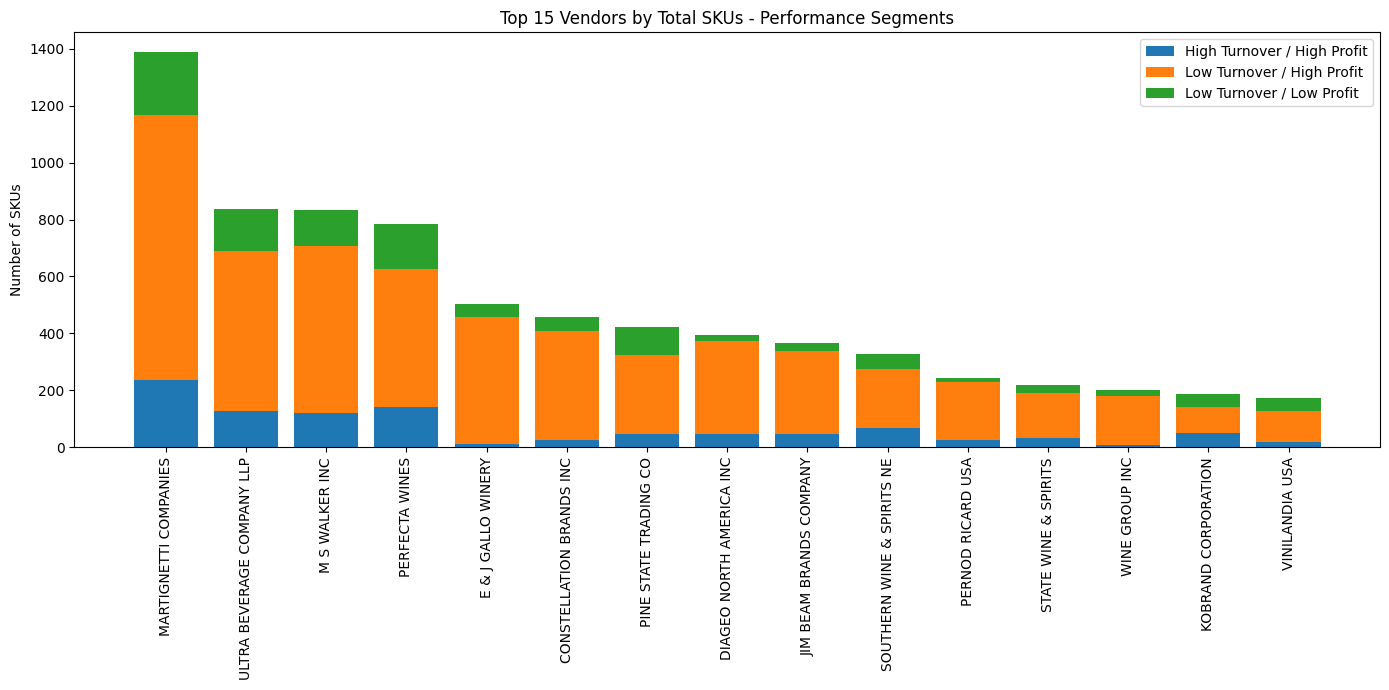

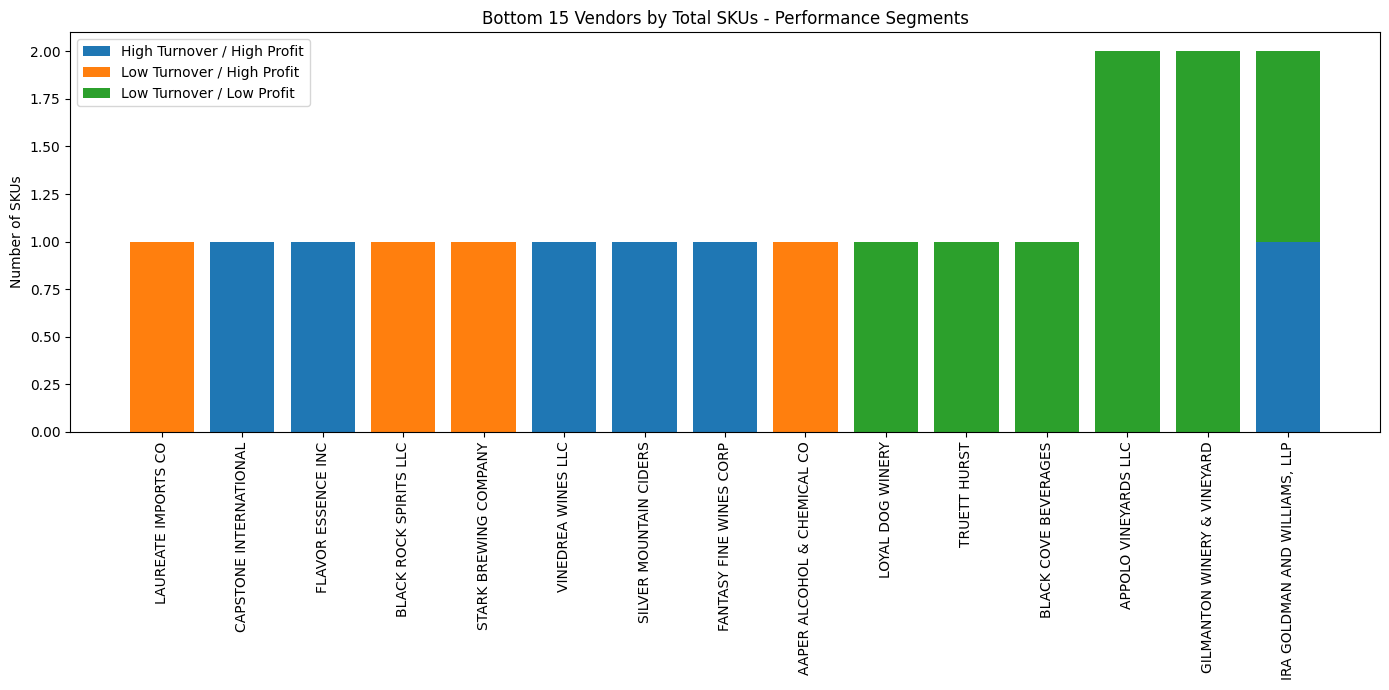

In [373]:
# Reset index so VendorName becomes a column
top_vendors = vendor_perf_segments.sort_values('Total_SKUs', ascending=False).head(15).reset_index()
bottom_vendors = vendor_perf_segments.sort_values('Total_SKUs', ascending=True).head(15).reset_index()

import matplotlib.pyplot as plt

# Top 15 vendors
plt.figure(figsize=(14,7))
plt.bar(top_vendors['VendorName'], top_vendors['High Turnover / High Profit'], label='High Turnover / High Profit')
plt.bar(top_vendors['VendorName'], top_vendors['Low Turnover / High Profit'], bottom=top_vendors['High Turnover / High Profit'], label='Low Turnover / High Profit')
plt.bar(top_vendors['VendorName'], top_vendors['Low Turnover / Low Profit'], 
        bottom=top_vendors['High Turnover / High Profit'] + top_vendors['Low Turnover / High Profit'], 
        label='Low Turnover / Low Profit')
plt.xticks(rotation=90)
plt.ylabel('Number of SKUs')
plt.title('Top 15 Vendors by Total SKUs - Performance Segments')
plt.legend()
plt.tight_layout()
plt.show()

# Bottom 15 vendors
plt.figure(figsize=(14,7))
plt.bar(bottom_vendors['VendorName'], bottom_vendors['High Turnover / High Profit'], label='High Turnover / High Profit')
plt.bar(bottom_vendors['VendorName'], bottom_vendors['Low Turnover / High Profit'], bottom=bottom_vendors['High Turnover / High Profit'], label='Low Turnover / High Profit')
plt.bar(bottom_vendors['VendorName'], bottom_vendors['Low Turnover / Low Profit'], 
        bottom=bottom_vendors['High Turnover / High Profit'] + bottom_vendors['Low Turnover / High Profit'], 
        label='Low Turnover / Low Profit')
plt.xticks(rotation=90)
plt.ylabel('Number of SKUs')
plt.title('Bottom 15 Vendors by Total SKUs - Performance Segments')
plt.legend()
plt.tight_layout()
plt.show()


In [375]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

In [ ]:
''' 
# Step 1: Count unique SKUs per vendor in each performance segment
vendor_perf_segments = sku.groupby(['VendorName', 'Performance_Segment'])['Description'] \
                          .nunique().unstack(fill_value=0).reset_index()

# Step 2: Add total unique SKUs per vendor
vendor_perf_segments['Total_SKUs'] = vendor_perf_segments.sum(axis=1, numeric_only=True)

# Step 3: Sort vendors by Total_SKUs to get top 15 and bottom 15
top_vendors = vendor_perf_segments.sort_values('Total_SKUs', ascending=False).head(15)
bottom_vendors = vendor_perf_segments.sort_values('Total_SKUs', ascending=True).head(15)

# Step 4: Plot stacked bar chart for top 15 vendors
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.bar(top_vendors['VendorName'], top_vendors['High Turnover / High Profit'], label='High Turnover / High Profit')
plt.bar(top_vendors['VendorName'], top_vendors['Low Turnover / High Profit'], 
        bottom=top_vendors['High Turnover / High Profit'], label='Low Turnover / High Profit')
plt.bar(top_vendors['VendorName'], top_vendors['Low Turnover / Low Profit'], 
        bottom=top_vendors['High Turnover / High Profit'] + top_vendors['Low Turnover / High Profit'], 
        label='Low Turnover / Low Profit')

plt.xticks(rotation=90)
plt.ylabel('Number of Unique SKUs')
plt.title('Top 15 Vendors by Unique SKUs and Performance Segments')
plt.legend()
plt.show()

# Step 5: Plot stacked bar chart for bottom 15 vendors
plt.figure(figsize=(14,7))
plt.bar(bottom_vendors['VendorName'], bottom_vendors['High Turnover / High Profit'], label='High Turnover / High Profit')
plt.bar(bottom_vendors['VendorName'], bottom_vendors['Low Turnover / High Profit'], 
        bottom=bottom_vendors['High Turnover / High Profit'], label='Low Turnover / High Profit')
plt.bar(bottom_vendors['VendorName'], bottom_vendors['Low Turnover / Low Profit'], 
        bottom=bottom_vendors['High Turnover / High Profit'] + bottom_vendors['Low Turnover / High Profit'], 
        label='Low Turnover / Low Profit')

plt.xticks(rotation=90)
plt.ylabel('Number of Unique SKUs')
plt.title('Bottom 15 Vendors by Unique SKUs and Performance Segments')
plt.legend()
plt.show()
'''

In [378]:
df['Profit_Margin'].describe()


count    10692.000000
mean       -15.620770
std        443.555329
min     -23730.638953
25%         13.324515
50%         30.405457
75%         39.956135
max         99.716657
Name: Profit_Margin, dtype: float64

In [379]:
df.columns


Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

In [380]:
df["Gross_Profit"].describe()

count    1.069200e+04
mean     1.213238e+04
std      4.622434e+04
min     -5.200278e+04
25%      5.292000e+01
50%      1.399640e+03
75%      8.660200e+03
max      1.290668e+06
Name: Gross_Profit, dtype: float64

In [381]:
df.plot(kind="barh", x="Gross_Profit", y="Description")

TypeError: no numeric data to plot

In [434]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actual_Price', 'Volume', 'Total_Purchase_Quantity',
       'Total_Purchase_in_Dollars', 'Total_Sales_Quantity',
       'Total_Sales_in_Dollars', 'Total_Sales_Price', 'Total_Excise_Tax',
       'Freight_Cost', 'Gross_Profit', 'Profit_Margin', 'Stock_Turnover',
       'Sales_to_Purchase_Ratio'],
      dtype='object')

In [445]:
df.groupby("VendorName")["Stock_Turnover"].sum().describe()

count     128.000000
mean      142.570588
std       357.495654
min         0.000000
25%         3.825776
50%        16.412117
75%       108.962505
max      2692.946530
Name: Stock_Turnover, dtype: float64

In [496]:
# Vendor Profitability & Risk Analysis 

# Top 10 Vendors by Gross Profit 
#df.groupby("VendorName")["Gross_Profit"].sum().sort_values(ascending= False).head(10)

# Bottom 10 Vendors by Gross Profit
df.groupby("VendorName")["Gross_Profit"].sum().sort_values(ascending=True).head(10)

VendorName
ADAMBA IMPORTS INTL INC         -9194.03
BLACK COVE BEVERAGES            -8208.19
VINEYARD BRANDS LLC             -6627.55
IRA GOLDMAN AND WILLIAMS, LLP   -4365.30
HIGHLAND WINE MERCHANTS LLC     -3966.64
UNCORKED                        -1874.92
GILMANTON WINERY & VINEYARD     -1555.44
LOYAL DOG WINERY                -1209.54
TAMWORTH DISTILLING             -1015.32
APPOLO VINEYARDS LLC             -782.78
Name: Gross_Profit, dtype: float64

In [498]:
# Vendor Gross_Profit summary stats - descriptions 

#df.groupby("VendorName")["Gross_Profit"].sum().describe()

# Just in case - might need it 
df["Gross_Profit"].describe()

count    1.069200e+04
mean     1.213238e+04
std      4.622434e+04
min     -5.200278e+04
25%      5.292000e+01
50%      1.399640e+03
75%      8.660200e+03
max      1.290668e+06
Name: Gross_Profit, dtype: float64

In [499]:
# Count of Vendor with GP less than (<) 0 

#(df.groupby("VendorName")["Gross_Profit"].sum() < 0).count() # ---> This gives 128 - which is just total of all Vendors
# THIS gives the count of all the True & False values of the condition we have given---> ("VendorName")["Gross_Profit"].sum() < 0

# BUT So we must use the .sum() function rather because we need the sum() of all the True 
(df.groupby("VendorName")["Gross_Profit"].sum() < 0).sum() # ---> This is the right one ---> 15 

np.int64(15)

In [500]:
# TOP 10 Sdev 
df.groupby('VendorName')["Gross_Profit"].std().sort_values(ascending=False).head(10)


VendorName
MAJESTIC FINE WINES            142601.667814
BROWN-FORMAN CORP              125918.118268
BACARDI USA INC                120422.209476
DIAGEO NORTH AMERICA INC       116759.529005
PERNOD RICARD USA              100319.420764
MOET HENNESSY USA INC           79893.988138
DISARONNO INTERNATIONAL LLC     78366.845798
PROXIMO SPIRITS INC.            58386.193847
STOLI GROUP,(USA) LLC           56137.445586
JIM BEAM BRANDS COMPANY         52651.367296
Name: Gross_Profit, dtype: float64

In [480]:
#6 Vendor Profit Margin: --> So since we can't just sum the profit_margin column and use .descrie() - we cannot just do this--->
''' df.groupby("VendorName")["Profit_Margin"].sum().describe() '''
# Rather we do this:

sum_GP = df.groupby("VendorName")["Gross_Profit"].sum()

sum_TotSls = df.groupby("VendorName")["Total_Sales_in_Dollars"].sum()


Vendor_Profit_Margin = sum_GP/sum_TotSls

Vendor_Profit_Margin.describe()

c:\My Projects\Python_30\my_venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    128.000000
mean           -inf
std             NaN
min            -inf
25%        0.139222
50%        0.263372
75%        0.329743
max        0.988470
dtype: float64

In [482]:
Vendor_PM_Cln = Vendor_Profit_Margin.replace([np.inf, -np.inf], np.nan).dropna()

''' Obvious Question
Btw can you please explain what you did here in this line? - You did - .replace([np.inf, -np.inf], np.nan) ---> 
which I understood as you're saying within the dataset if you find np.inf or -np.inf then replace it with --> 
np.nan yes? But then you're saying dropna() - so then why even replace it in the first place? 
Like why did you use the .replace() function and then did .dropna() - like why both?  
Vendor_PM_Clean = Vendor_Profit_Margin.replace([np.inf, -np.inf], np.nan).dropna() '''
# ANSWER Below:
# You replace inf with NaN so that dropna() can actually remove those rows. Without replacing, dropna() won’t remove infinite values.

" Obvious Question\nBtw can you please explain what you did here in this line? - You did - .replace([np.inf, -np.inf], np.nan) ---> \nwhich I understood as you're saying within the dataset if you find np.inf or -np.inf then replace it with --> \nnp.nan yes? But then you're saying dropna() - so then why even replace it in the first place? \nLike why did you use the .replace() function and then did .dropna() - like why both?  \nVendor_PM_Clean = Vendor_Profit_Margin.replace([np.inf, -np.inf], np.nan).dropna() "

In [483]:
Vendor_PM_Cln.describe()

count    126.000000
mean       0.040081
std        1.436669
min      -14.786524
25%        0.158346
50%        0.266100
75%        0.329812
max        0.988470
dtype: float64

In [484]:
# Top 10 
Vendor_PM_Cln.sort_values(ascending=False).head(10)

VendorName
FLAVOR ESSENCE INC             0.988470
CAPSTONE INTERNATIONAL         0.778669
SILVER MOUNTAIN CIDERS         0.774664
ALISA CARR BEVERAGES           0.692300
STAR INDUSTRIES INC.           0.688430
THE PIERPONT GROUP LLC         0.674119
R.P.IMPORTS INC                0.630708
FANTASY FINE WINES CORP        0.607314
VINEDREA WINES LLC             0.590922
BLACK PRINCE DISTILLERY INC    0.489449
dtype: float64

In [485]:
Vendor_PM_Cln.sort_values(ascending=True).head(10)

VendorName
TRUETT HURST                    -14.786524
IRA GOLDMAN AND WILLIAMS, LLP    -3.449249
HIGHLAND WINE MERCHANTS LLC      -2.586354
UNCORKED                         -1.717919
VINEYARD BRANDS LLC              -1.532750
BLACK COVE BEVERAGES             -1.311868
LOYAL DOG WINERY                 -1.088440
APPOLO VINEYARDS LLC             -0.484118
GILMANTON WINERY & VINEYARD      -0.405316
ADAMBA IMPORTS INTL INC          -0.136054
dtype: float64

In [490]:
# 7. Vendor Dependency ( % of total GP contributed by top vendors )

Gp = df.groupby("VendorName")["Gross_Profit"].sum()

(Gp.sort_values(ascending=False).head(5).sum()/Gp.sum())*100

np.float64(42.879166248951606)

In [491]:
(Gp.sort_values(ascending=False).head(10).sum()/Gp.sum())*100

np.float64(64.22108535612233)

In [492]:
(Gp.sort_values(ascending=True).head(5).sum()/Gp.sum())*100

np.float64(-0.02494746774155629)

In [494]:
(Gp.sort_values(ascending=True).head(10).sum()/Gp.sum())*100

np.float64(-0.02991048722724298)